In [2]:
import pyvisa

In [3]:
rm = pyvisa.ResourceManager()

In [4]:
rm.list_resources()

('ASRL1::INSTR', 'ASRL10::INSTR')

In [5]:
pippo = rm.open_resource("tcpip0::192.168.40.10::inst0::INSTR")

In [6]:
print(pippo.query('*IDN?'))

Keysight Technologies,N9916A,MY53104702,A.08.01



In [7]:
#percentuale batteria (sbagliato) (però 100% dà sempre 70)
print(pippo.query('SYST:BATT:ABSC?'))

70



# vna: vector network analyzer
# psa: power spectrum analyzer
TONO:SINUSOIDE
arrivano in ingresso frequenze



---

settiamo una freq min e una max
misuriamo s21: forward trasmition - segnale trasmesso
quello che vediamo è in dB

In [8]:
pluto = pippo.query('INST:SEL?')
pluto

'"NA"\n'

In [9]:
#imposta su VNA. Per Spectrum analyzer fare "SA"
pippo.query('INST:SEL "NA";*OPC?')

'1\n'

In [10]:

pippo.query('CALC:PAR1:DEF S21;*OPC?')
# NON VA
# pippo.query('CALC:PAR1:SEL;*OPC?')
# pippo.query('DISP:WIND:TRAC1:Y:AUTO;*OPC?')

'1\n'

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
pippo.query('CALC:FORM?')
pluto = pippo.query('TRACE:DATA? SDATA') #pag 767
# lista di parte reale e parte immaginaria alternati
pluto = list(map(float, pluto.strip('\n').split(','))) 
len(pluto)

402

Text(0, 0.5, 'dB')

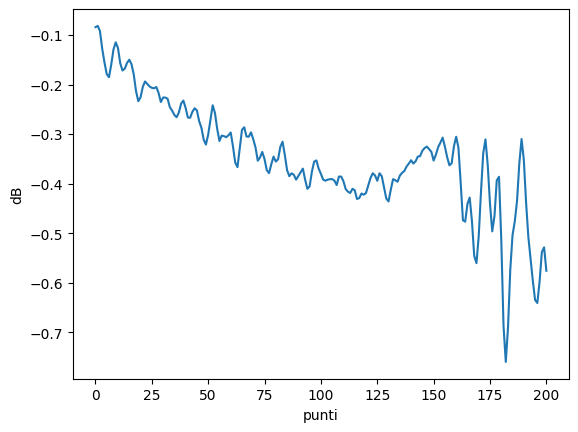

In [13]:
b = np.array(pluto[::2]) # parte imm
a = np.array(pluto[1::2]) # parte reale

#c = np.sqrt(np.array(a)**2+np.array(b)**2)
c= np.abs(a+1j*b)

# conversione in db 


c_dB = 20*np.log10(c)
plt.plot(c_dB)
min(c_dB)

# naming the x axis 
plt.xlabel('punti') 
# naming the y axis 
plt.ylabel('dB')


In [14]:

#mlog =

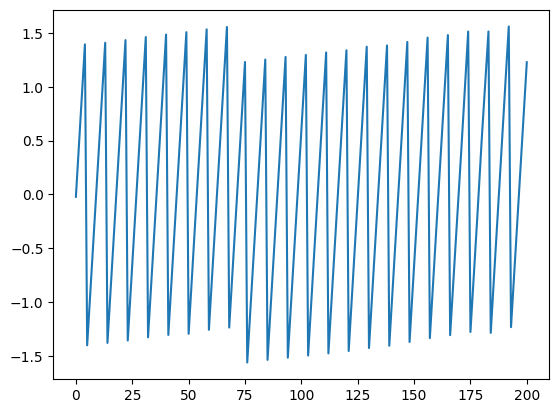

In [15]:
phase = np.arctan(b/a) 
plt.plot(np.unwrap(phase))

In [16]:
inietto = pippo.query('FREQ:DATA?')
inietto = list(map(float, inietto.strip('\n').split(',')))
inietto

[1000000000.0,
 1045000000.0,
 1090000000.0,
 1135000000.0,
 1180000000.0,
 1225000000.0,
 1270000000.0,
 1315000000.0,
 1360000000.0,
 1405000000.0,
 1450000000.0,
 1495000000.0,
 1540000000.0,
 1585000000.0,
 1630000000.0,
 1675000000.0,
 1720000000.0,
 1765000000.0,
 1810000000.0,
 1855000000.0,
 1900000000.0,
 1945000000.0,
 1990000000.0,
 2035000000.0,
 2080000000.0,
 2125000000.0,
 2170000000.0,
 2215000000.0,
 2260000000.0,
 2305000000.0,
 2350000000.0,
 2395000000.0,
 2440000000.0,
 2485000000.0,
 2530000000.0,
 2575000000.0,
 2620000000.0,
 2665000000.0,
 2710000000.0,
 2755000000.0,
 2800000000.0,
 2845000000.0,
 2890000000.0,
 2935000000.0,
 2980000000.0,
 3025000000.0,
 3070000000.0,
 3115000000.0,
 3160000000.0,
 3205000000.0,
 3250000000.0,
 3295000000.0,
 3340000000.0,
 3385000000.0,
 3430000000.0,
 3475000000.0,
 3520000000.0,
 3565000000.0,
 3610000000.0,
 3655000000.0,
 3700000000.0,
 3745000000.0,
 3790000000.0,
 3835000000.0,
 3880000000.0,
 3925000000.0,
 397000000

Text(0.5, 1.0, 'S21')

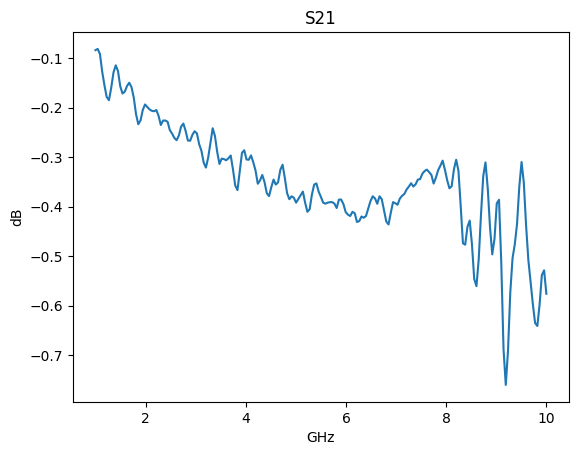

In [17]:
freqs = np.array(inietto)/1e9
plt.plot(freqs, c_dB)

# naming the x axis 
plt.xlabel('GHz') 
# naming the y axis 
plt.ylabel('dB')

# giving a title to my graph 
plt.title('S21')

In [18]:
pippo.query('FREQ:START ' + str(4e9)+ ';*OPC?')   #set freq iniziale
pippo.query('FREQ:STOP ' + str(8e9)+ ';*OPC?')

'1\n'

In [19]:
# https://pythonforthelab.com/blog/how-to-use-hdf5-files-in-python/

import h5py
import numpy as np
import matplotlib.pyplot as plt


In [17]:
import numpy as np
x = np.arange(100)                      # array di numeri da 0 a 99
y = np.random.normal(0 , 1, 100)        # cento numeri casuali con gauss, media 0, dev_std 1

with h5py.File("HDF5_try.hdf5", "w") as f:      # creo file hdf5 di nome tra virgolette e lo apro in modalità scrittura
    gp = f.create_group('Funzione')             # creo gruppo per i diversi dataset
    gp.create_dataset('x', data = x)            # creo i due dataset
    gp.create_dataset('y', data = y) 
    print(gp.items())
    a = 'x'
    print(gp.keys())
    if a in gp.keys():
        print('ciao')

TypeError: 'ItemsViewHDF5' object is not subscriptable

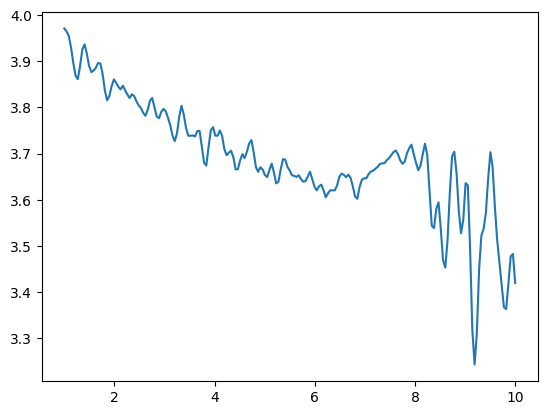

(201,)

In [73]:
I_mean = np.array([])
Q_mean = np.array([])
f_mean = np.array([])



with h5py.File("HDF52.hdf5", "r") as f:
   length = len(list(f['NA']))         # leggo file hdf5 (così lo apre in mod lettura e lo chiude)


   cnt = 0
   for j in list(f['NA']):
      
      if cnt == 4: 
         break

      i = np.array(f['NA'][j]['I'])
      q = np.array((f['NA'][j]['Q']))
      freq = np.array((f['NA'][j]['f']))
      
      if not I_mean.size:
         I_mean = i
         Q_mean = q
         
         f_mean = freq
      else:   
         I_mean = I_mean + (i/length)
         Q_mean = Q_mean + (q/length)
         #f_mean = f_mean + (freq/length)
      cnt += 1

      #Q_mean = Q_mean + (q/length)
      #freq_mean = freq_mean + (freq/length)




plt.plot(f_mean , 10*np.log10(I_mean**2 + Q_mean**2))
plt.show()

np.shape(I_mean)
  
   

   
    

In [60]:
I_mean

array([-0.99627282, -0.99669185, -0.98463062, -0.95795515, -0.91963407,
       -0.86038037, -0.79553297, -0.72353839, -0.63986913, -0.54774061,
       -0.44656253, -0.34773563, -0.22873367, -0.11176792,  0.00566575,
        0.11612745,  0.24343472,  0.35663973,  0.45557745,  0.55312046,
        0.64609727,  0.73214542,  0.80176824,  0.86235705,  0.91552651,
        0.95450099,  0.98034704,  0.99167109,  0.99152269,  0.97195155,
        0.94010165,  0.90012978,  0.84578711,  0.7822521 ,  0.7049509 ,
        0.61343049,  0.52062604,  0.4268508 ,  0.31907132,  0.20241334,
        0.08549034, -0.02851401, -0.14010345, -0.24748953, -0.3638626 ,
       -0.47974061, -0.57766059, -0.6616949 , -0.74198199, -0.81363318,
       -0.87427823, -0.92484092, -0.96207799, -0.98200544, -0.99015798,
       -0.98470951, -0.96533049, -0.93164349, -0.88675954, -0.82897643,
       -0.76267376, -0.69077139, -0.61060458, -0.49624016, -0.39024539,
       -0.2868016 , -0.17764535, -0.06329085,  0.05036535,  0.16

In [4]:
a = [1,2]
b = [3,4]

dic = {'a':a,'b':b}

dic.keys

dict_values([[1, 2], [3, 4]])

In [7]:
for i,k in dic.items():
    print(i,k)

a [1, 2]
b [3, 4]


In [42]:
import h5py

def r_hdf(name: str, name_data: str, nth_data: int):
    with h5py.File(name, 'r') as f:
        gp = f[name_data][str(nth_data)]
        dic = {}
        for i, k in gp.items():
            dic[i[:]] = k[:]
    return dic


def w_hdf(name, name_data, dataset):             # name = nome file hdf5    # name_data = NA o SA
    with h5py.File(name, 'a') as f:                      # creo file hdf5 di nome tra virgolette e lo apro in modalità a= append
        if name_data not in f.keys():
            gp = f.create_group(name_data)
        else:
            gp = f[name_data]
        gp_data = gp.create_group(str(len(gp.keys())))
        for i, k in dataset.items():
            gp_data.create_dataset(i, data = k)

        # capire per SA quali e quanti dati devo caricare
        # mettere la condizione che l'utente usi solo NA o SA

In [30]:
w_hdf('prova.hdf5', 'NA', dic)

In [43]:
r_hdf('prova.hdf5', 'NA', 0)

a
[1 2]
b
[3 4]
ciao


ValueError: Illegal slicing argument for scalar dataspace